# Portfolio Analysis of financial sector

### Stocks under observation:

    - Visa (NYSE:V) 
    - JPMorgan Chase (NYSE:JPM)
    - Berkshire Hathaway (NYSE:BRK-A)
    - Goldman Sachs Group (NYSE:GS)
    - Square (NYSE:SQ)
    - American Express Co. (NYSE:AXP)


In [10]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [11]:
financial = ['V', 'JPM', 'BRK-A', 'GS','SQ', 'AXP' ]
data = pd.DataFrame()
for i in range(len(financial)):
    
    df = wb.DataReader(financial[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = financial[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AXP,BRK-A,GS,JPM,SQ,V
Date,,,,,,
2020-01-02,125.154785,342261.0,232.896011,138.748215,63.830002,190.524582
2020-01-03,123.911690,339155.0,230.172668,136.917236,63.000000,189.009323
2020-01-06,123.374672,340210.0,232.528259,136.808365,62.570000,188.600601
2020-01-07,122.728264,338901.0,234.058914,134.482544,64.589996,188.102158
2020-01-08,124.846497,339188.0,236.315094,135.531631,67.599998,191.322098


Text(0, 0.5, 'price in $')

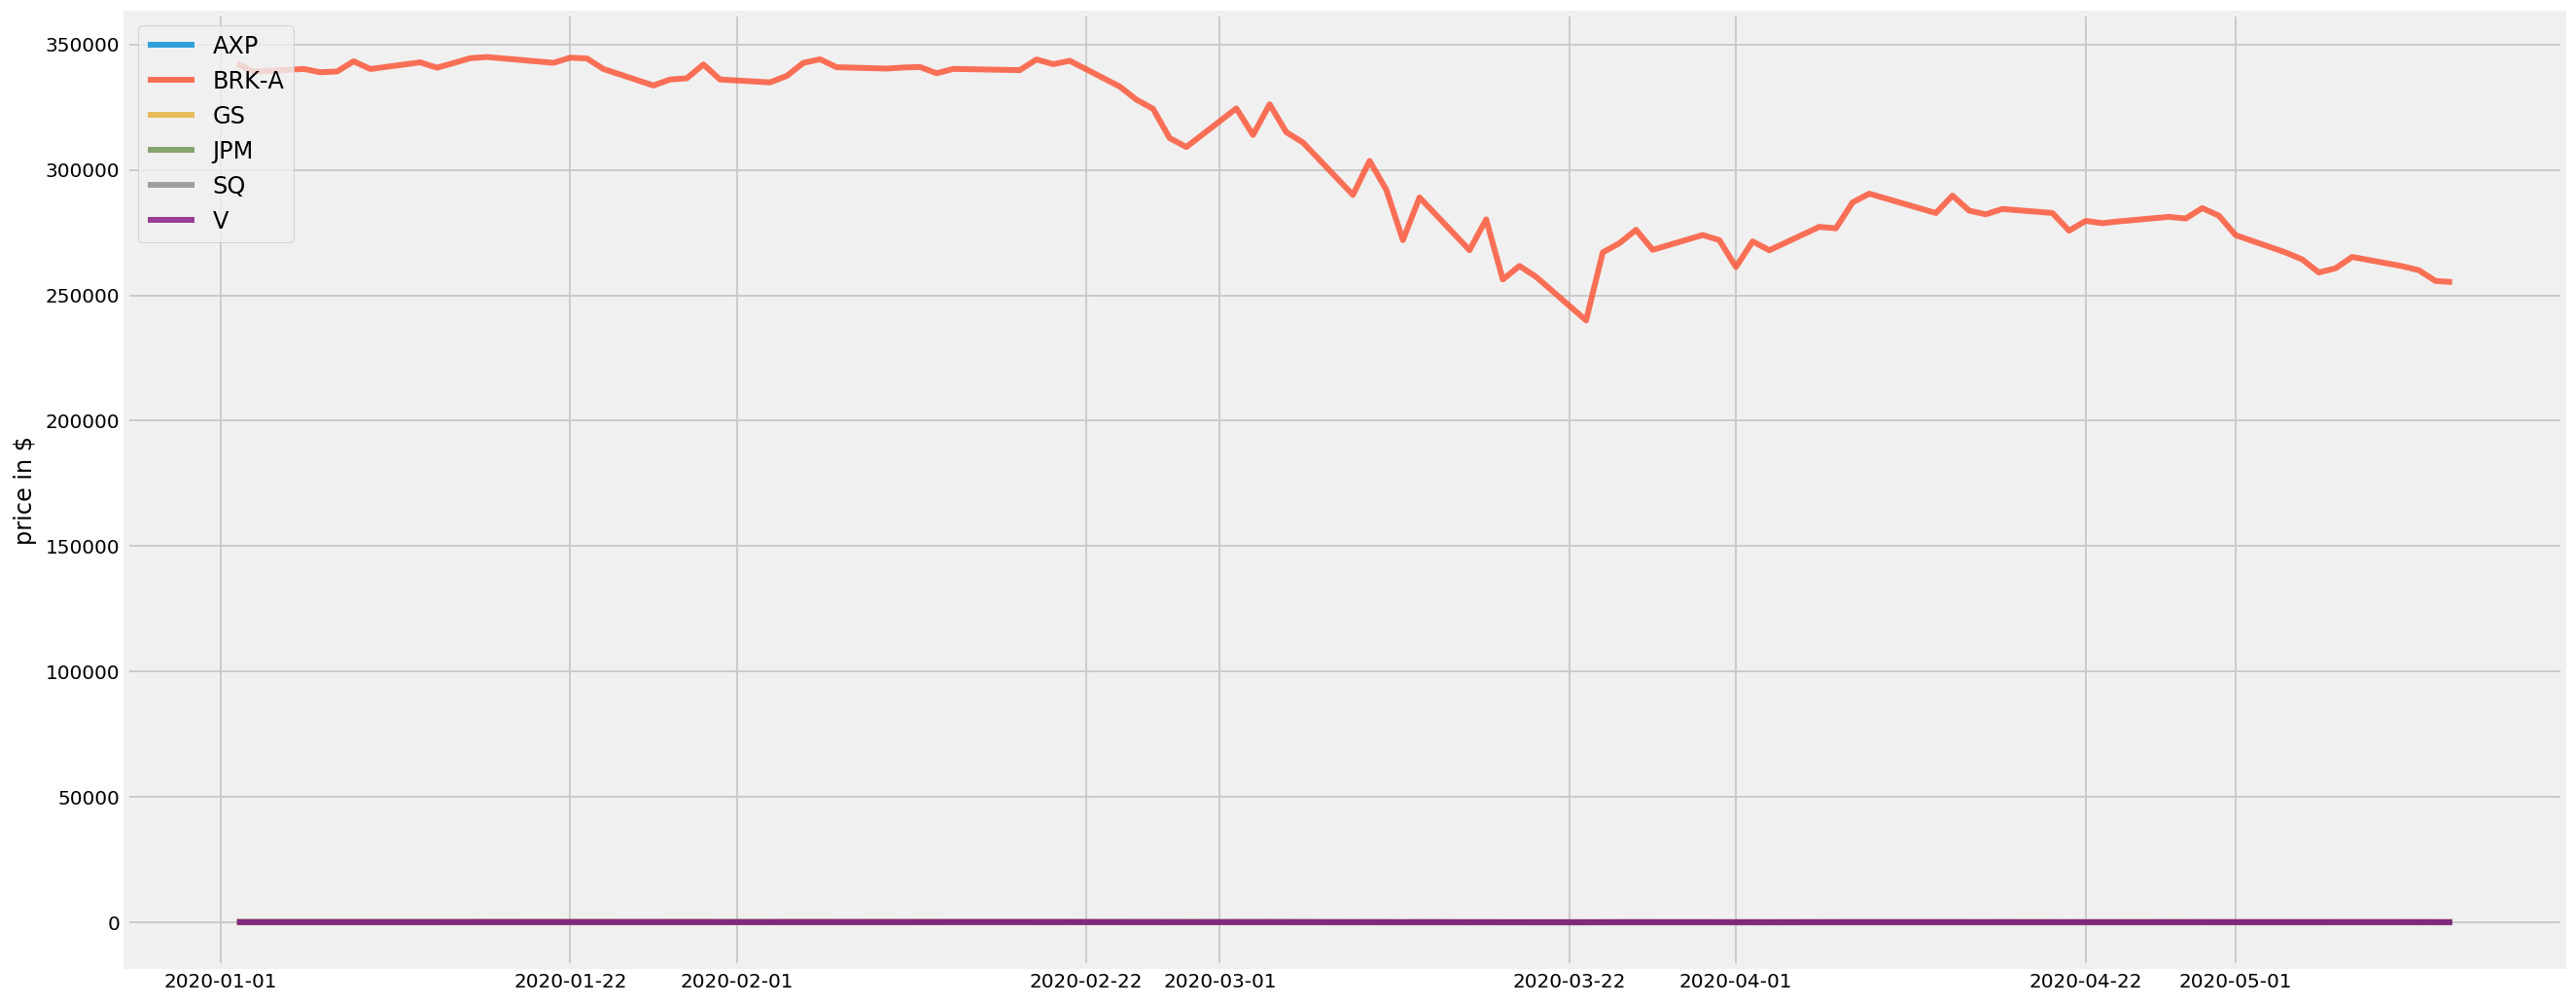

In [12]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

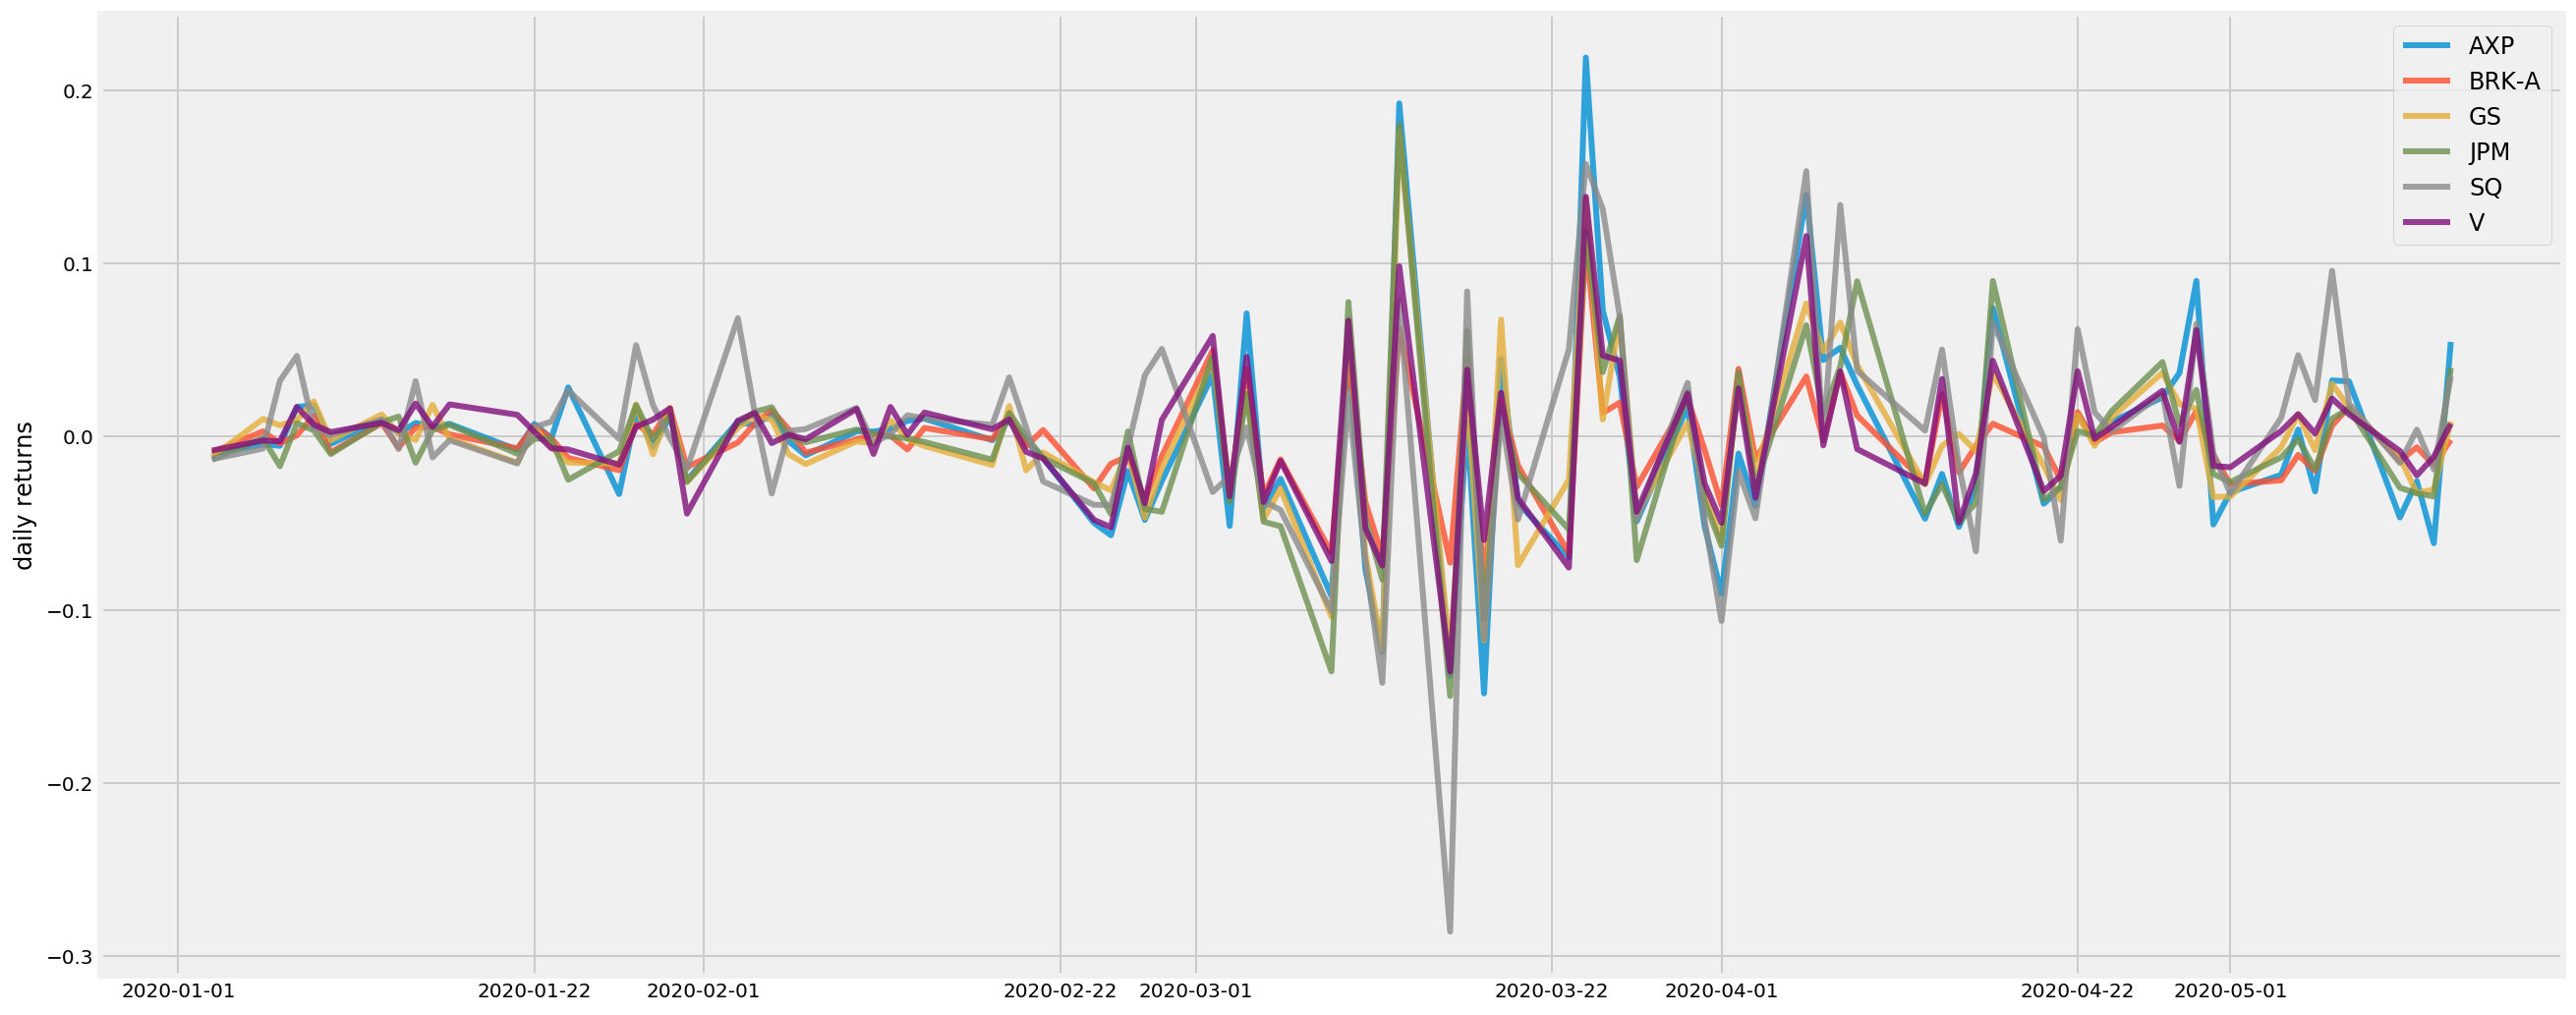

In [13]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

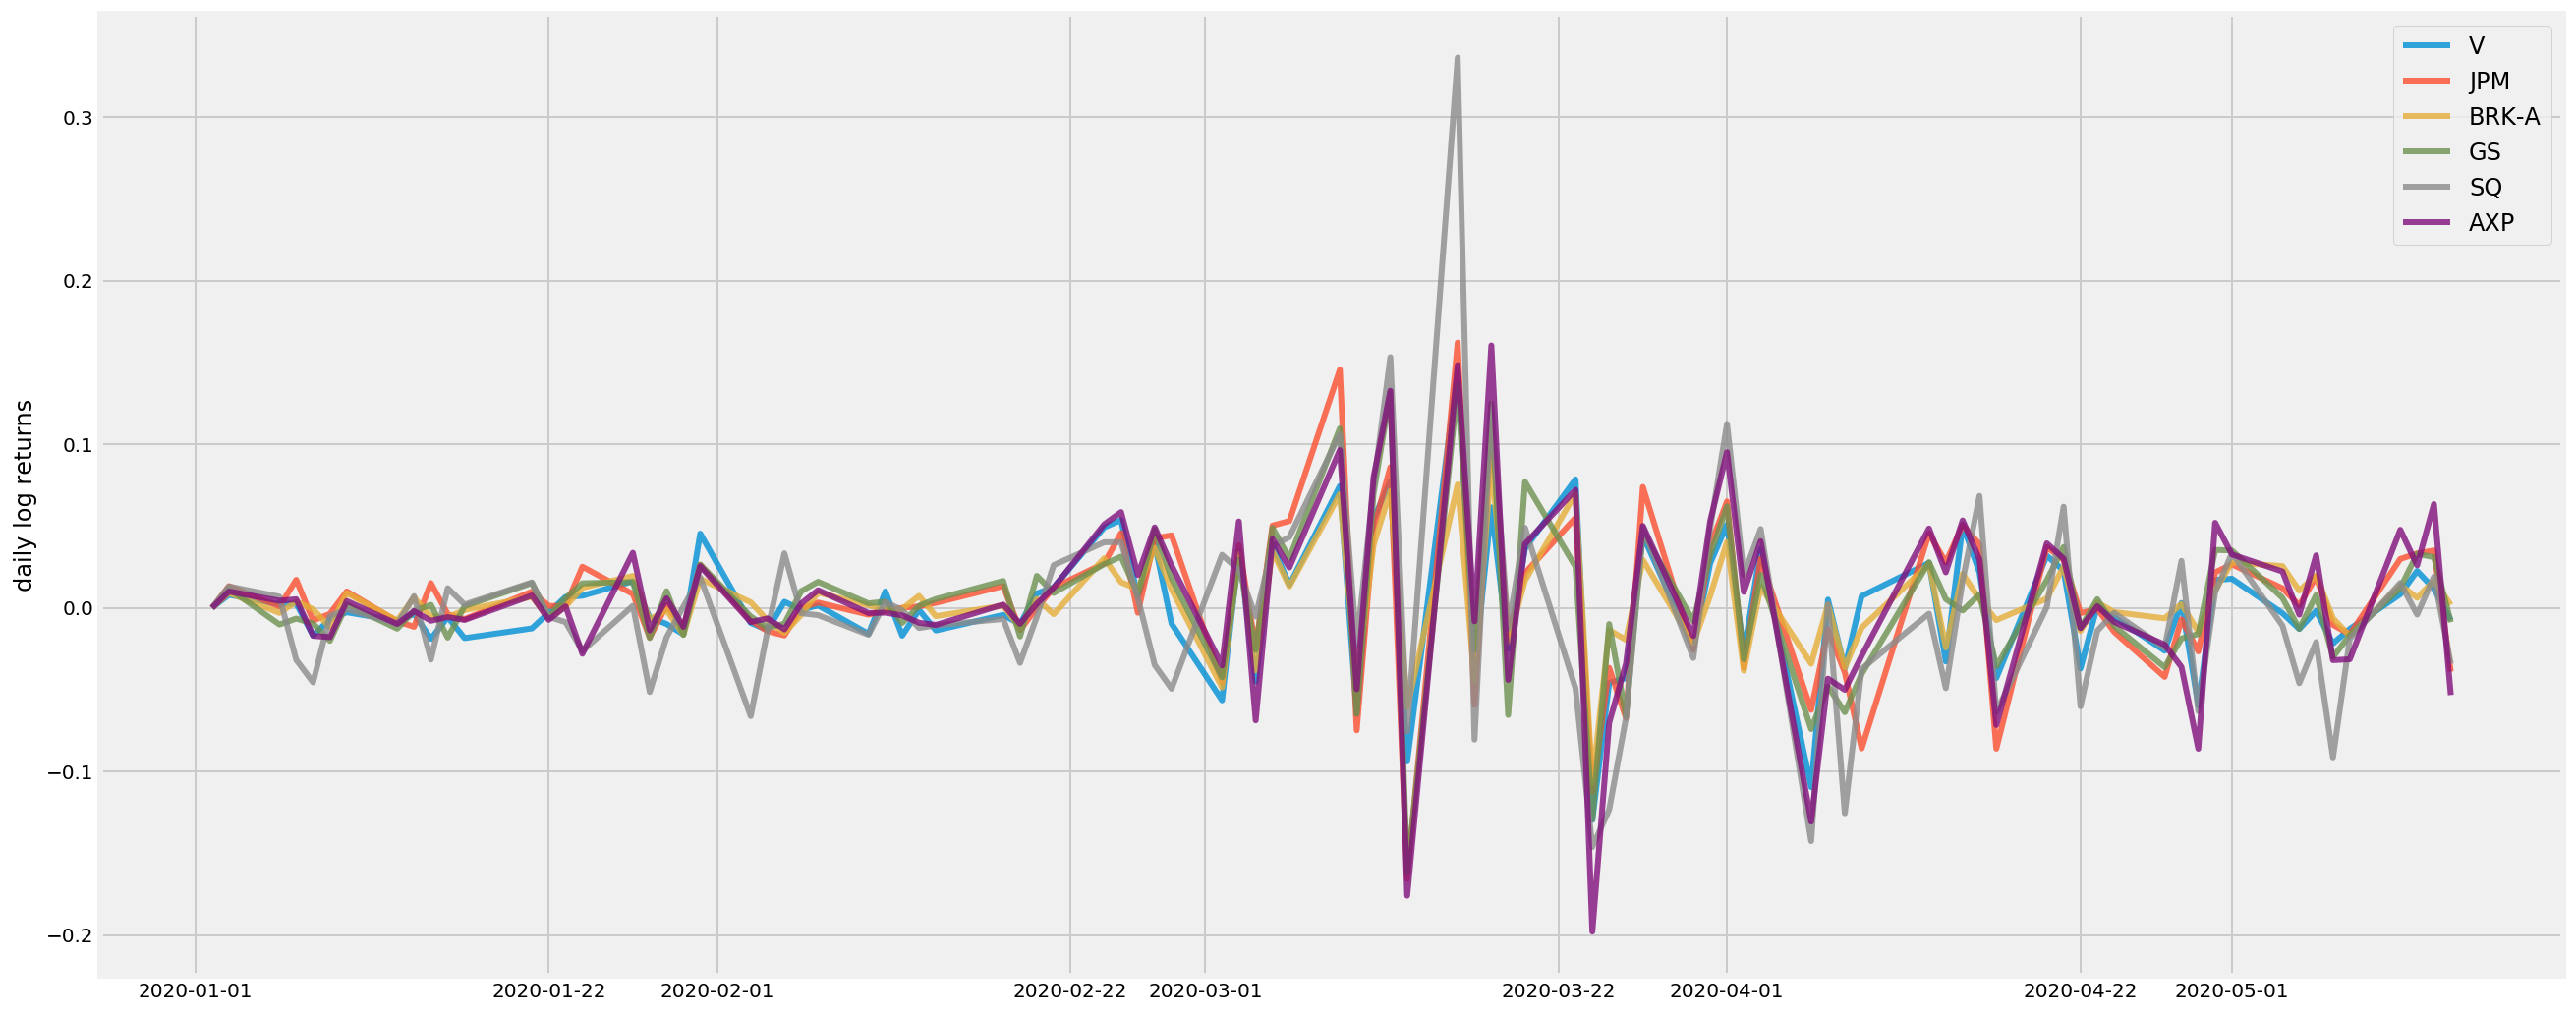

In [14]:
log = pd.DataFrame(columns = financial, index = table.index)

for i in range(len(financial)):
    log_list = []
    for j in range(len(table[financial[i]])):
        if(j+1<len(table[financial[i]])):
            log_returns =  np.log(table[financial[i]][j]) - np.log(table[financial[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[financial[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

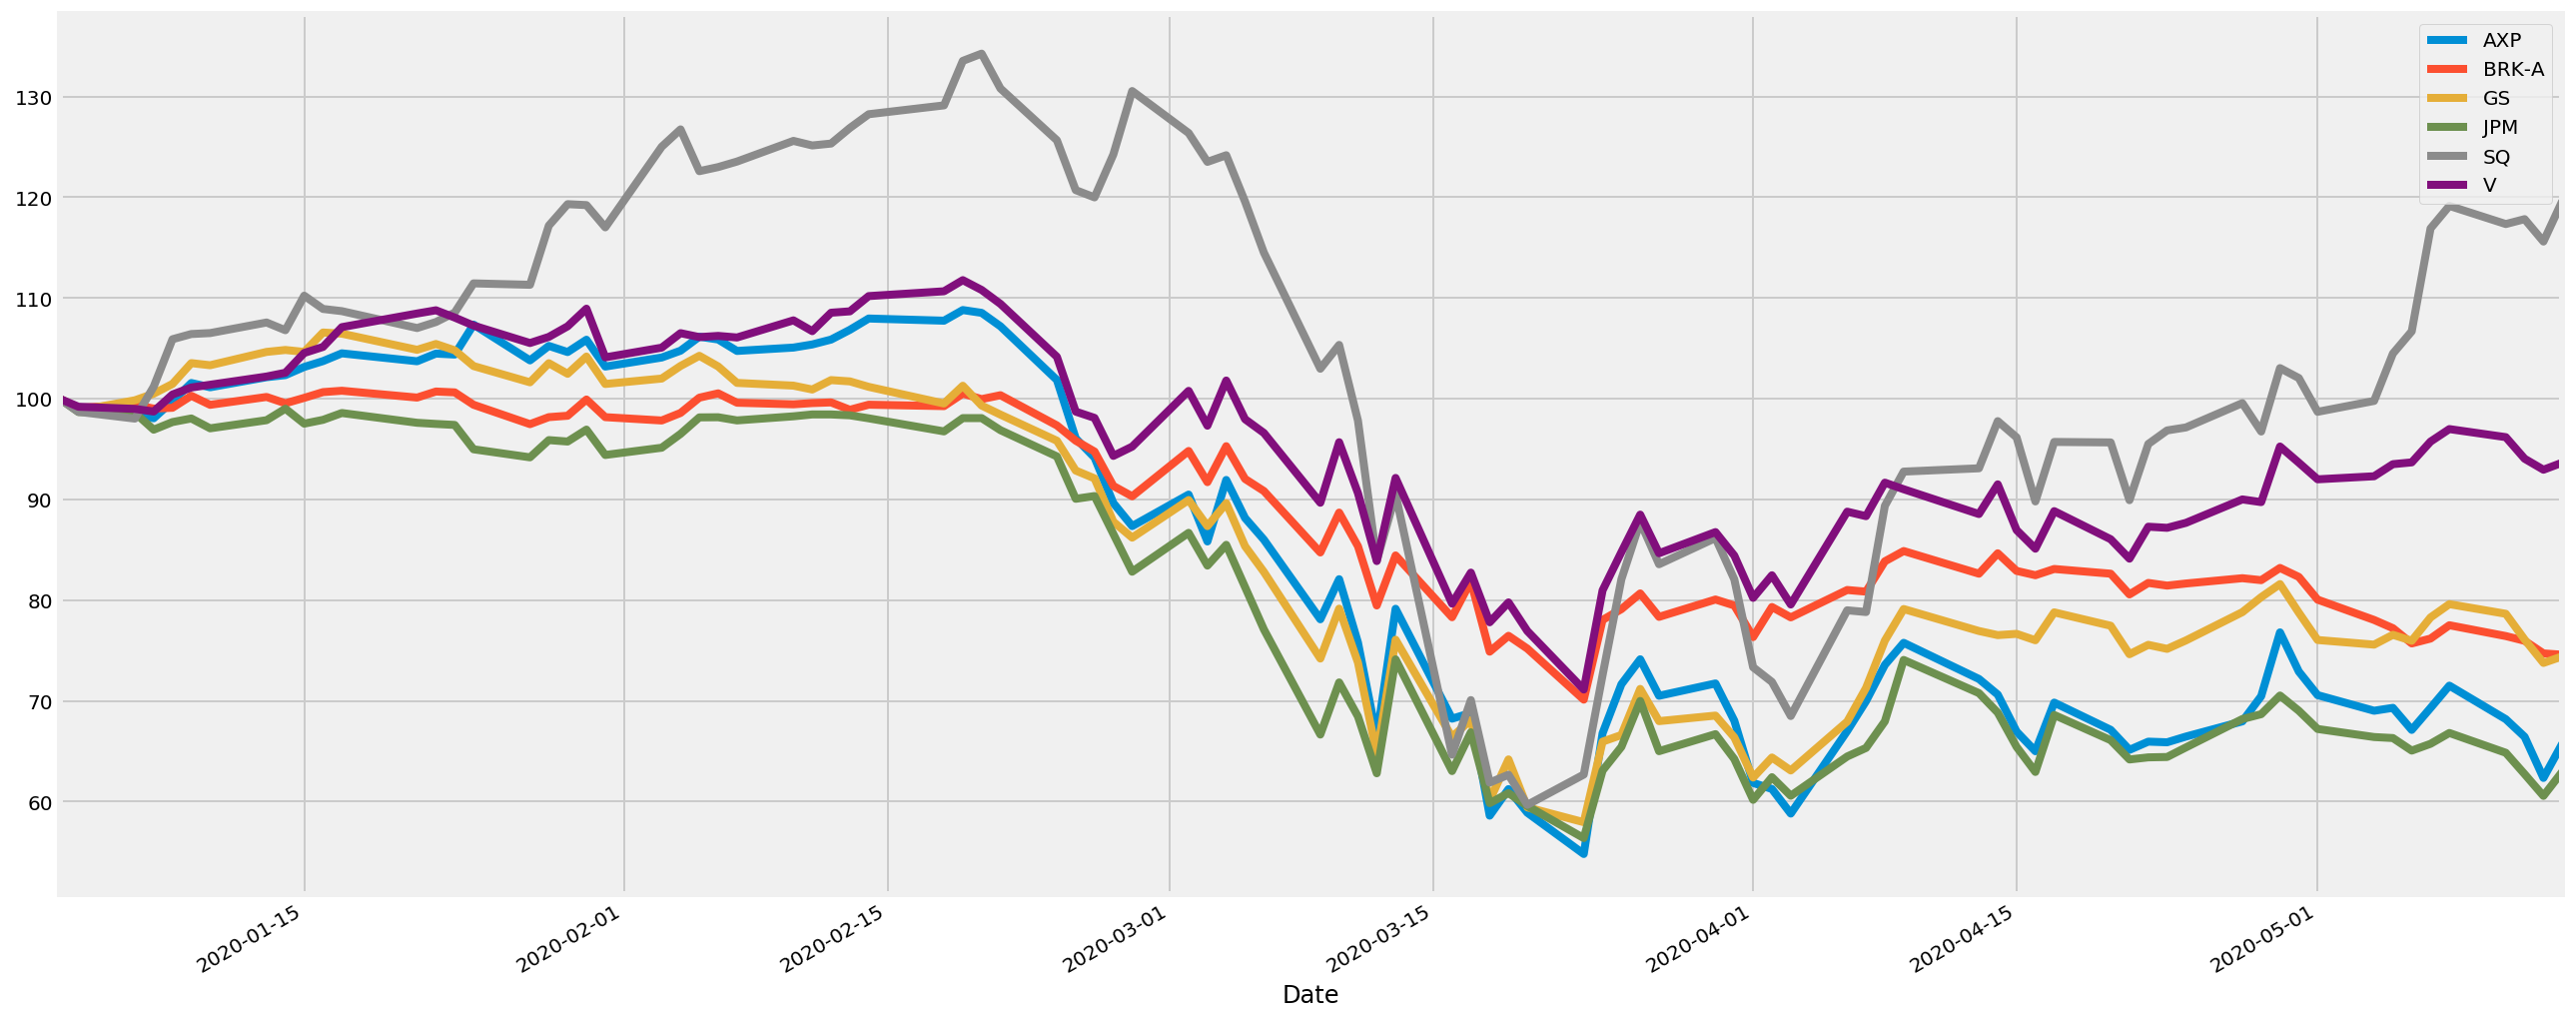

In [15]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [16]:
returns

,AXP,BRK-A,GS,JPM,SQ,V
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009932,-0.009075,-0.011693,-0.013196,-0.013003,-0.007953
2020-01-06,-0.004334,0.003111,0.010234,-0.000795,-0.006825,-0.002162
2020-01-07,-0.005239,-0.003848,0.006583,-0.017001,0.032284,-0.002643
2020-01-08,0.017260,0.000847,0.009639,0.007801,0.046602,0.017118
...,...,...,...,...,...,...
2020-05-08,0.031938,0.017373,0.016838,0.016336,0.019164,0.012971
2020-05-11,-0.046592,-0.013868,-0.012029,-0.029450,-0.015122,-0.008266
2020-05-12,-0.025665,-0.006120,-0.032485,-0.032678,0.004139,-0.022282


In [17]:
log.mean()*252

V        0.177714
JPM      1.253250
BRK-A    0.794777
GS       0.800737
SQ      -0.485671
AXP      1.135843
dtype: float64

In [18]:
log.std()*252**0.5

V        0.621516
JPM      0.739301
BRK-A    0.450750
GS       0.704327
SQ       0.984270
AXP      0.862545
dtype: float64